# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# Proyecto Final Sprint 13: Estrategia de Retención de Clientes para Model Fitness

## 1. Introducción y Descripción del Proyecto

### 1.1. Contexto del Negocio: La pérdida de clientes en gimnasios.

Cadena de gimnasios Model Fitness busca optimizar su estrategia de interacción con los clientes. Un desafío común en la industria de los gimnasios es la pérdida de clientes (churn), que no siempre es obvia (un cliente puede simplemente dejar de venir sin cancelar formalmente). Para Model Fitness, se considera que un cliente se ha ido si no visita el gimnasio durante un mes. Combatir esta pérdida es crucial para el éxito y la sostenibilidad del negocio.

### 1.2. Objetivo del Proyecto: Analizar perfiles de clientes para predecir la probabilidad de pérdida y elaborar una estrategia de retención.

El objetivo principal de este proyecto es utilizar datos analíticos para predecir la probabilidad de que un cliente se dé de baja en el próximo mes. Con base en esta predicción, se busca desarrollar una estrategia proactiva para retener a los clientes, mejorando así la atención y la satisfacción.

### 1.3. Tareas a Realizar:

#### Predecir la probabilidad de pérdida (para el próximo mes).

#### Elaborar retratos de usuarios típicos (clustering).

#### Analizar factores que impactan la pérdida.

#### Sacar conclusiones y hacer recomendaciones para mejorar la atención al cliente.
- Identificar a los grupos objetivo;
- Sugerir medidas para reducir la rotación;
- Describir cualquier otro patrón que observes con respecto a la interacción con los clientes.

### 1.4. Algunos Insigths previos:

**El problema más común de los gimnasios y otros servicios es la pérdida de clientes:**
- ¿Cómo descubres si un cliente ya no está contigo?
- Calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos.
- Un cliente se haya ido de puntillas.
- Si los usuarios compra en una tienda con poca frecuencia, pero regular, no se puede decir que ha huido. 
- Si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación (es posible que el seguidor se haya aburrido y abandonado).
- Si tiene sentido decir que un cliente se ha ido si no viene durante un mes (a excepción de un viaje)
- Si un cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

**Para combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes, debemos analizar y elaborar una estrategia de retención de clientes.**

## 2. Paso 1: Descargar y Cargar los Datos

### 2.1. Importación de librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

### 2.2. Carga del Dataset: `gym_churn_us.csv`

In [2]:
gym_churn = pd.read_csv('/datasets/gym_churn_us.csv')

### 2.3. Inspección Inicial:

#### Mostrar el tamaño del DataFrame (`.shape`).

In [3]:
# Tamaño del DataFrame
print("\n--- Tamaño del DataFrame ---")
print(gym_churn.shape)


--- Tamaño del DataFrame ---
(4000, 14)


#### Mostrar las primeras 5 filas (`.head()`).

In [4]:
# Primeras 5 filas
print("\n--- Primeras 5 filas del DataFrame ---")
print(gym_churn.head())


--- Primeras 5 filas del DataFrame ---
   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  

#### Limpiar nombres de columnas.

In [5]:
# Limpiar nombres de columnas con lower, strip, replace " " con guiones bajos
gym_churn.columns = gym_churn.columns.str.lower().str.replace(' ', '_')
print("\n--- Nombres de columnas actualizados ---")
print(gym_churn.columns.tolist())


--- Nombres de columnas actualizados ---
['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'churn']


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<b>Éxito</b> - Muy buen inicio: la carga, inspección y limpieza de columnas se ejecutó de forma clara y ordenada, dejando el dataset listo para el análisis posterior.
</div>


## 3. Paso 2: Análisis Exploratorio de Datos (EDA)

### 3.1. Calidad de los Datos:

#### Verificar características ausentes (`.info()`).

In [6]:
# Verificar características ausentes
print("\n--- Información general del DataFrame (incluyendo valores no nulos y tipos de datos) ---")
gym_churn.info()


--- Información general del DataFrame (incluyendo valores no nulos y tipos de datos) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                      

- **Nota:**
    - No existen valores nulos.
    - Algunos Dtype ya están en un formato numérico (0/1), característico de ser binarias (0 o 1). Aunque son categóricas en su significado, como gender ("masculino" o "femenino") están ya codificadas numéricamente como entero, para efectos del uso de algoritmos de Machine Learning. Es decir, no requieren más adelante de una transformación adicional como One-Hot Encoding si ya son 0/1.

#### Estudiar valores promedio y desviación estándar (`.describe()`).

In [7]:
# Valores promedio y desviación estándar
print("\n--- Estadísticas descriptivas del DataFrame ---")
print(gym_churn.describe())


--- Estadísticas descriptivas del DataFrame ---
            gender  near_location      partner  promo_friends        phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       contract_period  group_visits          age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000

**Características Binarias (0 o 1):**
- gender, near_location, partner, promo_friends, phone, group_visits, churn:
- count: Todas tienen 4000 entradas. Confirma no hay valores ausentes.
- mean: La media representa la proporción de "1s" en la columna.
    - gender (0.51): Aproximadamente el 51% de los clientes son de un género (si 1 representa un género y 0 el otro).
    - near_location (0.85): La gran mayoría (85%) de los clientes viven o trabajan cerca del gimnasio. Esto es un factor importante.
    - partner (0.49): Casi la mitad (49%) de los clientes trabajan en una compañía asociada.
    - promo_friends (0.31): Alrededor del 31% de los clientes se inscribieron por una oferta de "trae a un amigo".
    - phone (0.90): La mayoría (90%) de los clientes proporcionaron su número de teléfono.
    - group_visits (0.41): Cerca del 41% de los clientes participan en sesiones grupales.
    - churn (0.27): La tasa de cancelación es del 27%. Significa que el 27% de los clientes se van en el mes en cuestión. Una tasa significativa que se busca reducir.
- std (desviación estándar): Indica la variabilidad. Para binarias, un valor cercano a 0.5 indica una distribución más equitativa entre 0s y 1s, mientras que un valor más bajo indica que una de las categorías es mucho más frecuente (como en phone).
- min, 25%, 50%, 75%, max: Para binarias, estos valores siempre serán 0 o 1, confirmando su naturaleza binaria.
---
**Características Numéricas Continuas o Discretas:**
- contract_period:
    - mean (4.68): El periodo de contrato promedio es de aproximadamente 4.7 meses.
    - min (1), max (12): Los contratos van de 1 mes a 1 año.
    - 50% (1): La mediana es 1 mes, lo que sugiere que una gran parte de los clientes opta por contratos cortos. Esto podría ser un indicador de riesgo de cancelación.
- age:
    - mean (29.18): La edad promedio de los clientes es de 29 años.
    - min (18), max (41): El rango de edad es de 18 a 41 años.
- avg_additional_charges_total:
    - mean (146.94): En promedio, los clientes gastan unos $147 adicionales.
    - std (96.36): Hay una desviación estándar alta, lo que indica una gran variabilidad en el gasto adicional. Algunos gastan muy poco (min 0.15), otros mucho (max 552.59).
- month_to_end_contract:
    - mean (4.32): Promedio de 4.32 meses restantes en el contrato.
    - min (1), max (12): Rango esperado.
- lifetime:
    - mean (3.72): Los clientes han estado en el gimnasio un promedio de 3.72 meses.
    - min (0), max (31): Rango amplio, desde clientes nuevos hasta muy antiguos.
- avg_class_frequency_total:
    - mean (1.88): Frecuencia media de visitas por semana a lo largo de la vida del cliente es de casi 2 veces por semana.
    - std (0.97): Variabilidad moderada.
- avg_class_frequency_current_month:
    - mean (1.77): Frecuencia media de visitas por semana durante el mes en curso es similar a la total, pero ligeramente menor.
    - std (1.05): También variabilidad moderada.
---
**Observaciones clave:**
- No hay valores ausentes: Todas las columnas tienen 4000 entradas, lo cual es excelente y simplifica el preprocesamiento.
- Tasa de Cancelación (Churn): El 27% es una métrica clave para el negocio.
- Contratos Cortos: La mediana de contract_period es 1. Sugiere preferencia por contratos mensuales, a menudo asociados a mayor riesgo de cancelación.
- Clientes Cercanos: La alta proporción de near_location (85%) indica que la proximidad es un factor dominante en la base de clientes.
- Variabilidad en Ggstos adicionales y frecuencia: avg_additional_charges_total, avg_class_frequency_total y avg_class_frequency_current_month muestran una buena dispersión. Sugiere que estas características podrían ser muy predictivas.
---
**Nota:** - Estos valores nos dan una base sólida para formular hipótesis sobre qué características podrían estar más relacionadas con la cancelación de clientes. Por ejemplo, los clientes con contratos más cortos, menos visitas, o que gastan menos en servicios adicionales, podrían tener una mayor probabilidad de irse.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<b>Éxito</b> - El análisis exploratorio inicial es sólido: identificaste la ausencia de valores nulos, interpretaste adecuadamente las métricas descriptivas y resaltaste variables clave para la predicción de la cancelación.
</div>


### 3.2. Análisis por Grupo de Cancelación (`groupby('Churn')`):

#### Observar los valores medios de las características para clientes que se fueron (`Churn=1`) y los que se quedaron (`Churn=0`).

In [8]:
# Observar churn=1 y churn=0.
print("\n--- Valores medios de las características por grupo de cancelación ---")
# Agrupar DF por columna 'churn' y calcular la media de las demás columnas (perfil promedio de clientes churn=0 y churn=1.
print(gym_churn.groupby('churn').mean())


--- Valores medios de las características por grupo de cancelación ---
         gender  near_location   partner  promo_friends     phone  \
churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       contract_period  group_visits        age  avg_additional_charges_total  \
churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       month_to_end_contract  lifetime  avg_class_frequency_total  \
churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       avg_class_frequency_current_month  
churn 

#### **Hipótesis:** ¿Qué diferencias iniciales se observan entre estos grupos?

- Basado en la tabla de promedios anterior se observa en churn=0 y churn=1, lo siguiente:
    - **`gender` (género):** Valores medios muy similares (aprox. 0.51 para ambos). Sugiere que el género no es factor significativo en la cancelación.
    - **`near_location` (cercanía a la ubicación):** Clientes que se quedan (`churn=0`) tienen un valor medio más alto (0.87) que los que se van (`churn=1`, 0.77). Indica que la **proximidad al gimnasio es un factor importante para la retención**. Los clientes que viven o trabajan cerca son más propensos a quedarse.
    - **`partner` (socio de empresa):** Los clientes que se quedan tienen una mayor proporción de ser socios de empresa (0.53) en comparación con los que se van (0.35). Sugiere que los **descuentos o beneficios mediante empresas asociadas contribuyen a la retención**.
    - **`promo_friends` (promoción por amigos):** Igual que `partner`, los que se quedan tienen mayor proporción de haberse inscrito por una promoción de amigos (0.35) que los que se van (0.18). Indica que las **referencias y las ofertas promocionales iniciales son un buen indicador de lealtad**.
    - **`phone` (teléfono):** Aprox. 0.90 para ambos, casi todos los clientes proporcionan un número de teléfono, y no es un factor diferenciador para la cancelación.
    - **`contract_period` (período del contrato):** Los que se quedan tienen un `contract_period` promedio de 5.75 meses, mientras que los que se van tienen un promedio de solo 1.73 meses. Los **clientes con contratos más largos son mucho más leales y menos propensos a cancelar**.
    - **`group_visits` (visitas grupales):** Los que se quedan participan más en visitas grupales (0.46) que los que se van (0.27). La **participación en actividades grupales fomenta la retención**.
    - **`age` (edad):** Los que se quedan son ligeramente mayores en promedio (29.98 años) que los que se van (26.99 años). La edad pudiese tener una relación aunque no muy marcada como el período del contrato.
    - **`avg_additional_charges_total` (cargos adicionales promedio):** Los que se quedan gastan mucho más en servicios adicionales (158.45) que los que se van (115.08). El **gasto en servicios adicionales es un indicador de compromiso y lealtad**.
    - **`month_to_end_contract` (meses para finalizar contrato):** Los que se quedan tienen más meses restantes en su contrato (5.28) que los que se van (1.66). Coherente con la observación del `contract_period` y refuerza que la **proximidad al fin del contrato es un gran predictor de cancelación**.
    - **`lifetime` (tiempo como cliente):** Los que se quedan llevan mucho más tiempo en el gimnasio (4.71 meses) que los que se van (0.99 meses). Los **clientes nuevos son mucho más propensos a cancelar**.
    - **`avg_class_frequency_total` (frecuencia de clases total promedio):** Los que se quedan visitan el gimnasio con mucha más frecuencia en general (2.02 veces/semana) que los que se van (1.47 veces/semana).
    - **`avg_class_frequency_current_month` (frecuencia de clases mes actual promedio):** Mucha diferencia. Los clientes que se quedan visitan 2.02 veces/semana en el mes actual, mientras que los que se van visitan solo 1.04 veces/semana. Sugiere que una **disminución en la frecuencia de visitas en el mes actual es una señal de alerta inmediata de posible cancelación**.
---   
- **En resumen, las hipótesis iniciales sugieren que los clientes con mayor riesgo de cancelación son aquellos que:**
    - Tienen contratos de corta duración (especialmente de 1 mes).
    - Son clientes nuevos (bajo `lifetime`).
    - Tienen una baja frecuencia de visitas, especialmente en el mes actual.
    - Gastan menos en servicios adicionales.
    - No trabajan en una empresa asociada ni se inscribieron por recomendación de un amigo.
    - No participan en clases grupales.
    - No viven o trabajan cerca del gimnasio.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<b>Éxito</b> - El análisis comparativo por grupo de cancelación es claro y bien fundamentado, identificando patrones de retención y riesgo que serán útiles para la modelación y las recomendaciones estratégicas.
</div>


### 3.3. Visualización de Distribuciones:

In [9]:
# Columnas numéricas para histogramas (distribución)
numerical_cols = [
    'age',
    'avg_additional_charges_total',
    'lifetime',
    'avg_class_frequency_total',
    'avg_class_frequency_current_month',
    'contract_period', # Aunque discreto, su rango permite un histograma significativo
    'month_to_end_contract' # Similar a contract_period
]

# Columnas binarias/categóricas para countplots (conteo por categoría)
binary_categorical_cols = [
    'gender',
    'near_location',
    'partner',
    'promo_friends',
    'phone',
    'group_visits'
]

#### Trazar histogramas de barras para cada característica numérica, diferenciando entre `Churn=0` y `Churn=1`.

--- Histograma de Distribuciones de Características Numéricas por Churn ---


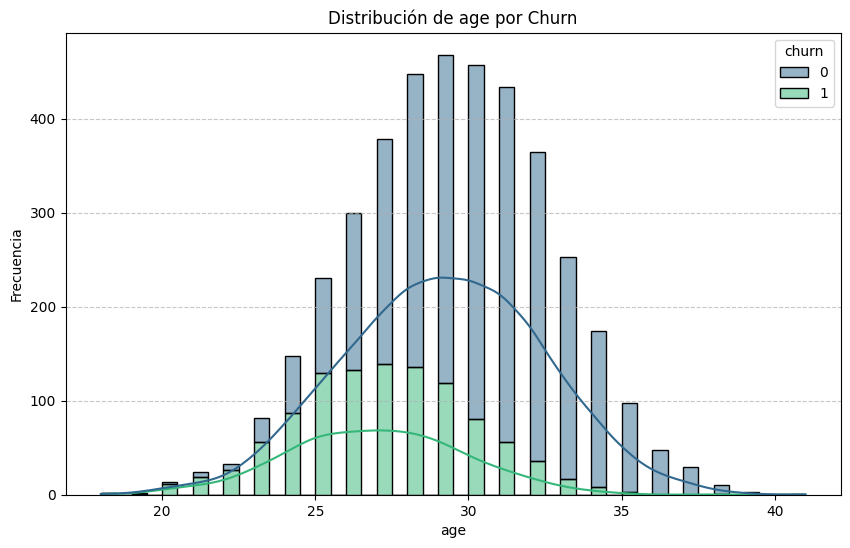

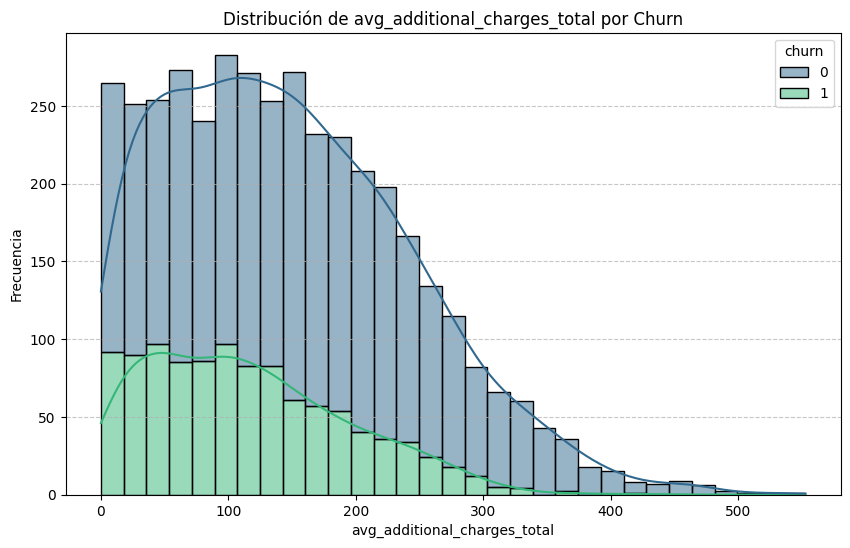

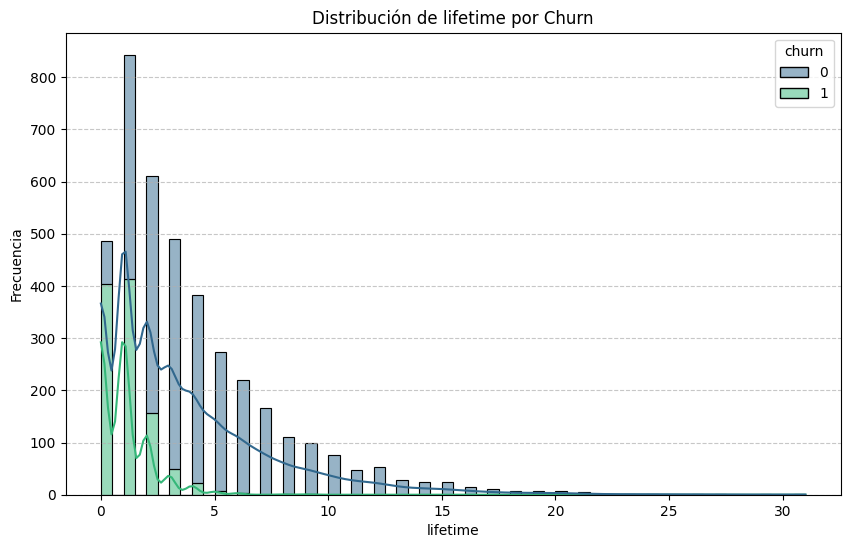

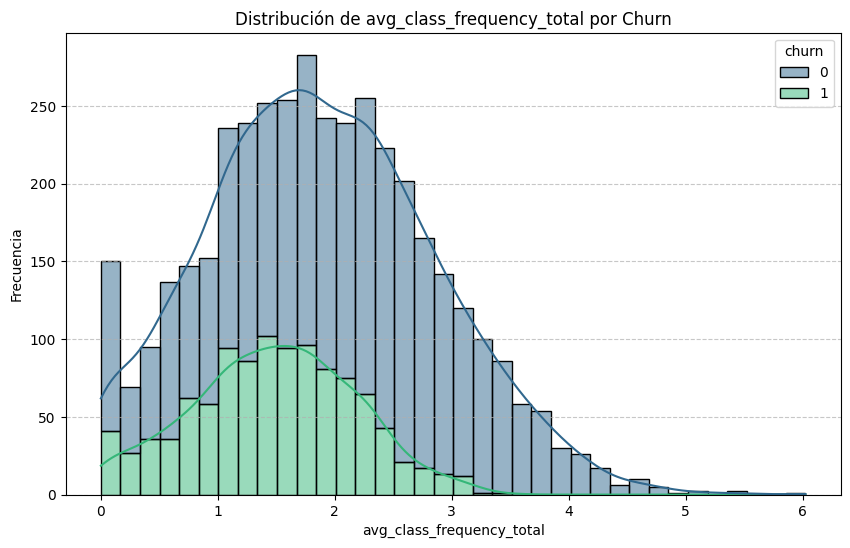

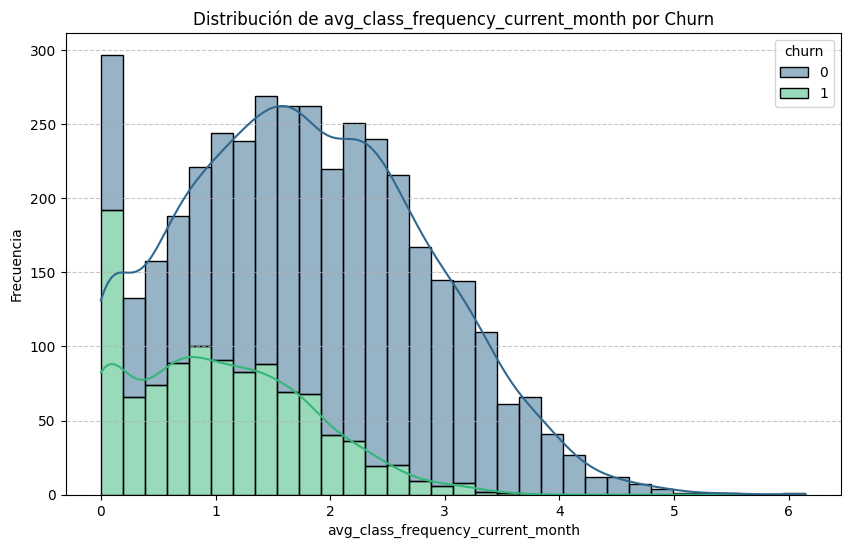

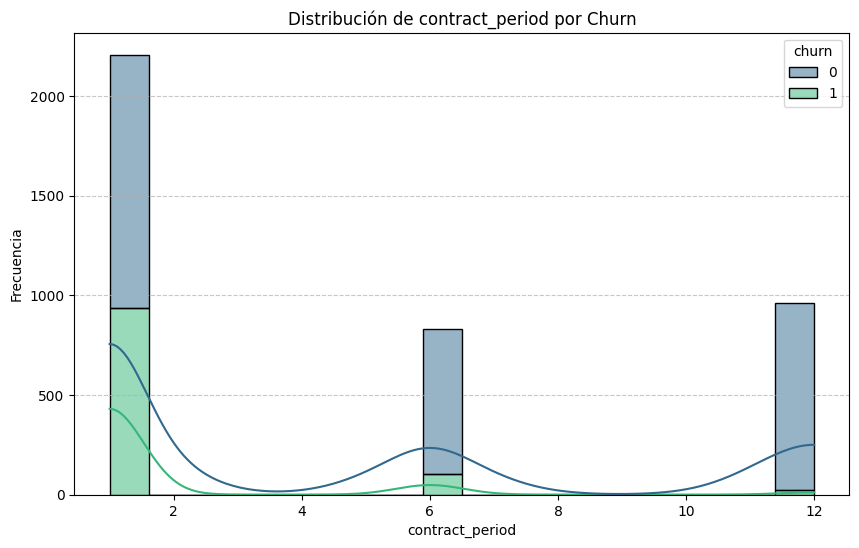

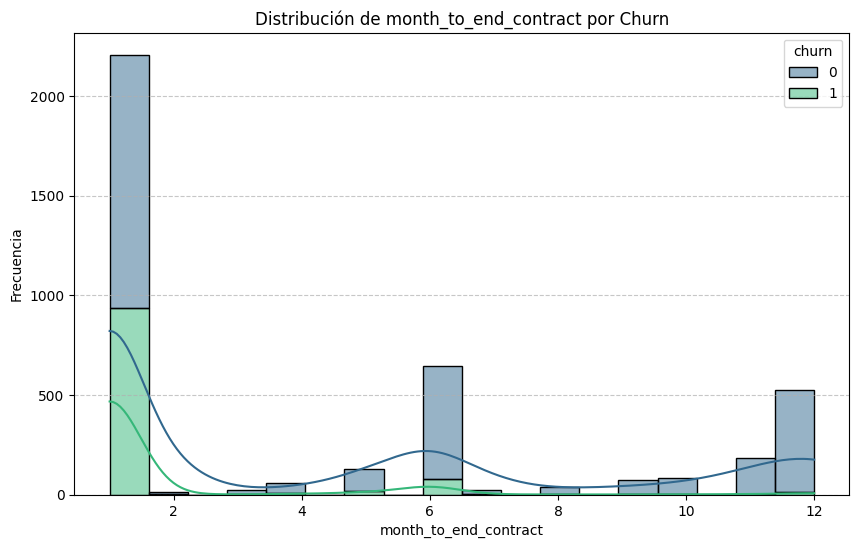

In [10]:
print("--- Histograma de Distribuciones de Características Numéricas por Churn ---")
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=gym_churn, x=col, hue='churn', kde=True, multiple="stack", palette='viridis')
    plt.title(f'Distribución de {col} por Churn')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

**1. Distribución de age por Churn**
- Ambas (churn=0 y churn=1) tienen una forma similar a una campana, pero la curva de churn=1 (verde) está ligeramente desplazada hacia edades más jóvenes y es más ancha.
- La curva de churn=0 (azul) está más centrada en edades un poco mayores.
- Los clientes que cancelan (churn=1) tienden a ser más jóvenes en promedio que los clientes que se quedan (churn=0). La superposición es considerable, pero la tendencia es clara.

**2. Distribución de avg_additional_charges_total por Churn**
- La distribución de churn=0 (azul) se extiende mucho más hacia valores de gasto adicional más altos
- La de churn=1 (verde) se concentra fuertemente en valores bajos de gasto adicional.
- Clara separación con la mayoría de los clientes que cancelan gastando menos de USD 100 - USD 150.
- Los que gastan menos en servicios adicionales son muy propensos a cancelar. Gasto adicional más alto, es fuerte indicador de retención.

**3. Distribución de lifetime por Churn**
- La distribución de churn=1 (verde) está muy concentrada en valores bajos de lifetime (0 a 2 meses) con un pico muy alto en 0-1 mes.
- La distribución de churn=0 (azul) tiene una cola mucho más larga hacia valores de lifetime más altos.
- Clientes nuevos o con muy poco tiempo en el gym (lifetime bajo) son los más propensos a cancelar. La lealtad aumenta drásticamente con el tiempo.

**4. Distribución de avg_class_frequency_total por Churn**
- Ambas distribuciones similares en forma pero la curva de churn=1 (verde) está desplazada hacia frecuencias de visita más bajas.
- Clientes con una frecuencia de visitas promedio más baja a lo largo de su vida en el gym, son más propensos a cancelar.
- Las visitas regulares son clave para la retención.

**5. Distribución de avg_class_frequency_current_month por Churn**
- La curva de churn=1 (verde) está muy concentrada en frecuencias de visita bajas en el mes actual, con un pico claro en 0-1 visita por semana.
- La baja frecuencia de visitas en el mes actual es indicador fuerte de cancelación inminente.
- Clientes que no están viniendo activamente en el mes actual tienen una alta probabilidad de irse.

**6. Distribución de contract_period por Churn**
- Pico enorme de churn=1 (verde) en el contract_period de 1 mes.
- Para contratos de 6 y 12 meses la proporción de churn=0 (azul) es mucho mayor.
- Clientes con contratos de 1 mes son más propensos a cancelar.
- Los contratos más largos (6 y 12 meses) están fuertemente asociados con la retención.

**7. Distribución de month_to_end_contract por Churn**
- Pico muy alto de churn=1 (verde) cuando month_to_end_contract es 1. Para valores más altos, la proporción de churn=0 es mucho mayor.
- Proximidad al fin del contrato (en especial 1 mes restante) es indicador de cancelación. Los que están a punto de finalizar su contrato son un grupo de alto riesgo.

**Conclusiones generales:**
- Los histogramas confirman las hipótesis que formulamos a partir de las medias. Las características que muestran las diferencias más notables entre los clientes que se quedan y los que se van son:
    - lifetime: Los clientes nuevos son de altísimo riesgo.
    - contract_period y month_to_end_contract: Los contratos cortos y la cercanía al fin del contrato son predictores muy fuertes de cancelación.
    - avg_additional_charges_total: Menor gasto adicional se asocia con mayor cancelación.
    - avg_class_frequency_total y avg_class_frequency_current_month: Menor frecuencia de visitas (especialmente en el mes actual) es un claro indicador de cancelación.
---
**Nota:** 
Estas visualizaciones son extremadamente valiosas para entender el comportamiento de los clientes y guiar las estrategias de retención.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<b>Éxito</b> - Buen uso de la visualización para respaldar hallazgos, logrando una conexión clara entre los datos y las conclusiones del análisis exploratorio.
</div>



#### Trazar distribuciones de características para variables categóricas.


--- Conteo de Características Categóricas/Binarias por Churn ---


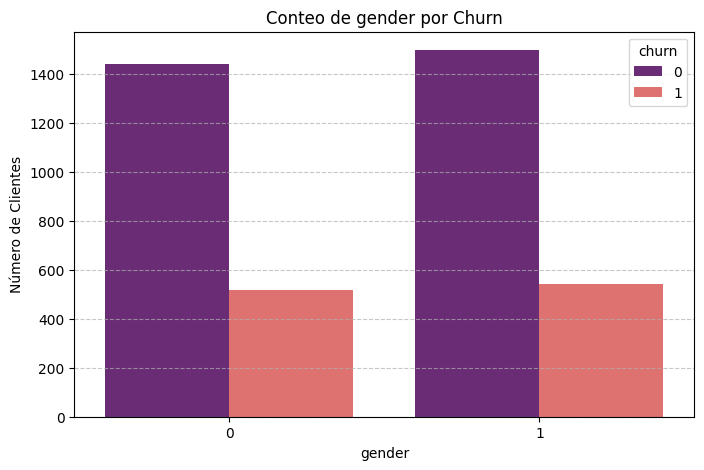

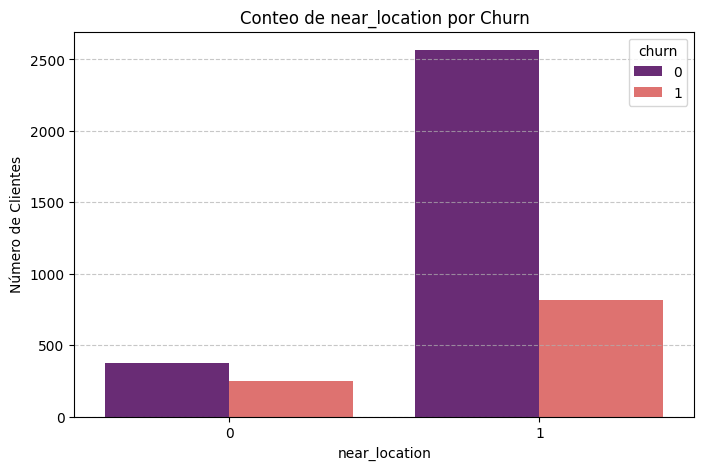

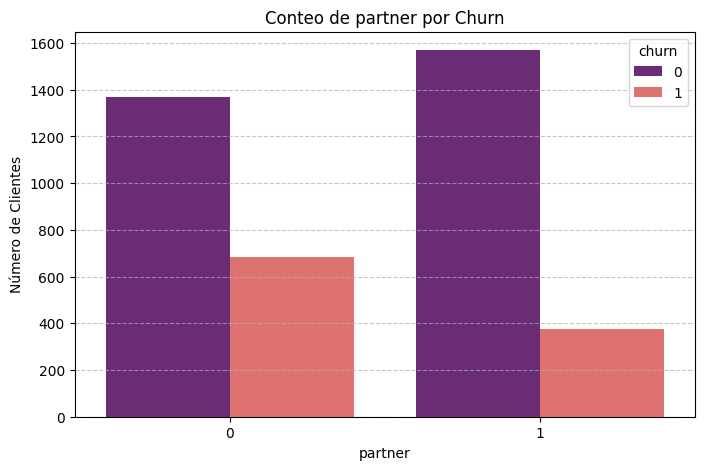

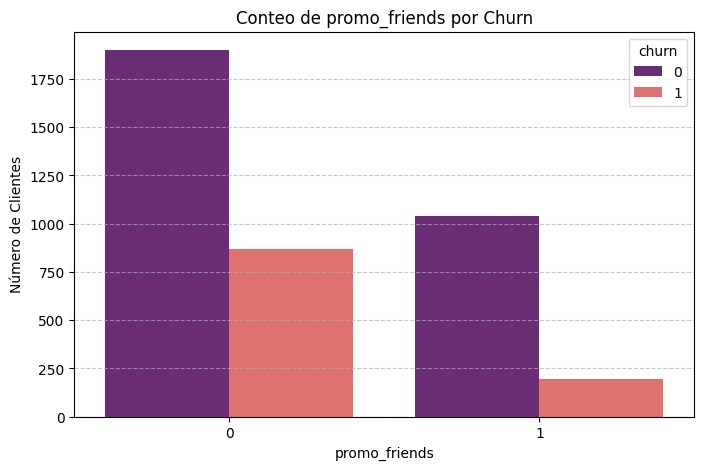

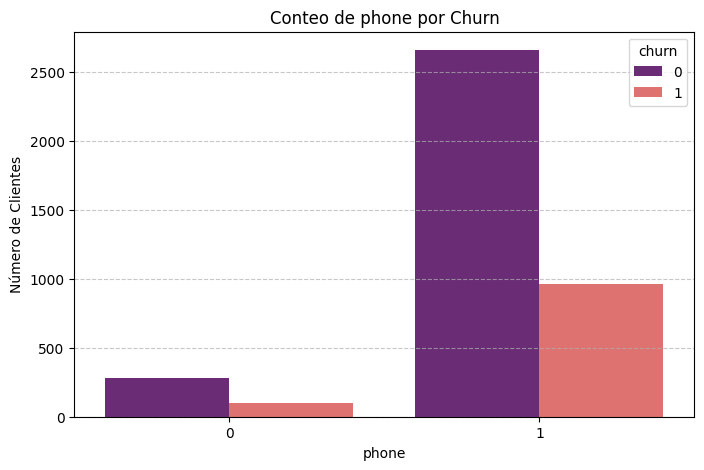

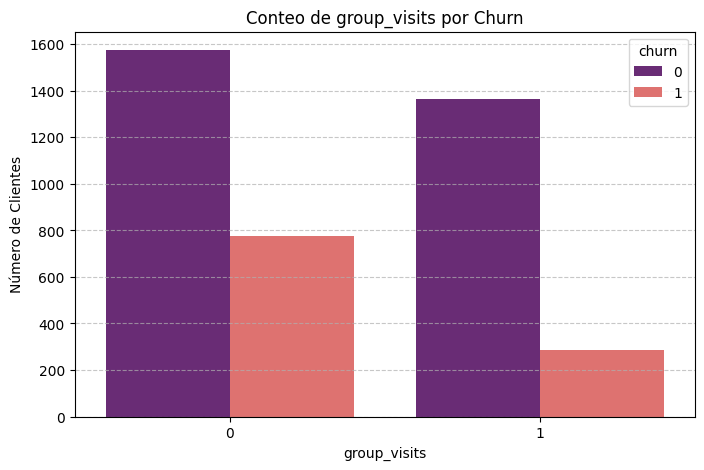

In [11]:
print("\n--- Conteo de Características Categóricas/Binarias por Churn ---")
for col in binary_categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=gym_churn, x=col, hue='churn', palette='magma')
    plt.title(f'Conteo de {col} por Churn')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

#### **Interpretación:** ¿Hay características donde la distribución difiere notablemente entre los grupos de cancelación?

**Análisis de Histogramas (Características Numéricas):**
- **`age` (edad):** Distribución de clientes que cancelan (`churn=1`, color salmón) es ligeramente más concentrada en edades más jóvenes (alrededor de 25-28 años) en comparación con los clientes que se quedan (`churn=0`, color morado), cuya distribución es más amplia y se extiende a edades más maduras. Esto sugiere que los clientes más jóvenes podrían tener una mayor propensión a cancelar.
- **`avg_additional_charges_total` (cargos adicionales promedio):** Clientes que se quedan (`churn=0`) muestran una distribución de gasto adicional mucho más amplia y con valores más altos, mientras que los clientes que cancelan (`churn=1`) se concentran fuertemente en valores bajos de gasto adicional (cerca de 0 a 150). Indica **un mayor gasto en servicios adicionales está fuertemente asociado con la retención**.
- **`lifetime` (tiempo como cliente):** Distribución de `churn=1` está muy concentrada en los primeros meses (0 a 2 meses), con un pico muy alto en 0-1 mes. Los **clientes nuevos o con muy poco tiempo en el gimnasio son los más propensos a cancelar**. Los clientes con mayor `lifetime` son predominantemente retenidos.
- **`avg_class_frequency_total` (frecuencia de clases total promedio):** Distribución de `churn=1` está desplazada hacia frecuencias de visita más bajas en comparación con `churn=0`. Clientes que cancelan tienden a visitar el gimnasio con menos frecuencia en general.
- **`avg_class_frequency_current_month` (frecuencia de clases mes actual promedio):** Clientes que cancelan muestran una frecuencia de visitas muy baja en el mes actual (con un pico cerca de 0-1 visita por semana). **Fuerte indicador de cancelación inminente**.
-  **`contract_period` (período del contrato):** Pico muy alto de `churn=1` en los contratos de 1 mes. En los contratos de 6 y 12 meses la proporción de `churn=0` es abrumadoramente mayor. Confirma que los **contratos de corta duración (1 mes) están fuertemente asociados con la cancelación** mientras que los contratos más largos promueven la retención.
-  **`month_to_end_contract` (meses para finalizar contrato):** Similar a `contract_period`, pico muy alto de `churn=1` cuando queda solo 1 mes para finalizar el contrato. Sugiere que la **proximidad al fin del contrato es un predictor crítico de cancelación**.

**Análisis de Countplots (Características Categóricas/Binarias):**
- **`gender` (género):** Las proporciones de `churn=0` y `churn=1` son muy similares para ambos géneros (0 y 1). Esto indica que el **género no parece ser un factor diferenciador significativo** en la tasa de cancelación.
- **`near_location` (cercanía a la ubicación):** La proporción de `churn=1` es más alta para los clientes que **NO** viven o trabajan cerca del gimnasio (`near_location=0`). Para `near_location=1`, la mayoría de los clientes se quedan. Confirma que la **proximidad al gimnasio es importante para la retención**.
- **`partner` (socio de empresa):** Proporción de `churn=1` es muy alta para los clientes que **NO** trabajan en una compañía asociada (`partner=0`). Los clientes que sí son socios (`partner=1`) tienen una tasa de cancelación mucho menor. Sugiere que los **beneficios por ser socio de empresa contribuyen a la retención**.
- **`promo_friends` (promoción por amigos):** Similar a `partner`, los clientes que **NO** se inscribieron por una oferta de "trae a un amigo" (`promo_friends=0`) tienen una mayor proporción de `churn=1`. Los que sí vinieron por esta promoción (`promo_friends=1`) son más leales. Indica que las **referencias de amigos fomentan la retención**.
- **`phone` (teléfono):** La mayoría de clientes, tanto los que se quedan como los que se van, proporcionaron su número de teléfono (`phone=1`). La proporción de `churn=1` es muy similar en ambos grupos. **Haber proporcionado el número de teléfono no es un factor diferenciador** para la cancelación.
- **`group_visits` (visitas grupales):** La proporción de `churn=1` es mayor para los clientes que **NO** participan en sesiones grupales (`group_visits=0`). Los que participan (`group_visits=1`) son más propensos a quedarse. Sugiere que la **participación en actividades grupales contribuye a la retención**.
---
**Conclusión General de las Visualizaciones de Distribución:**
- Las visualizaciones confirman y refuerzan las hipótesis iniciales sobre las diferencias entre los clientes que se quedan y los que se van. Los clientes con mayor riesgo de cancelación (churn=1) son aquellos que::
    - 1. **`lifetime`:** Son nuevos o llevan poco tiempo (lifetime bajo).
      2. **`contract_period` y `month_to_end_contract`:** Tienen contratos cortos (contract_period bajo) y están cerca de su fin (month_to_end_contract bajo).
      3. **`avg_additional_charges_total`:** Gastan menos en servicios adicionales (avg_additional_charges_total bajo).
      4. **`avg_class_frequency_total` y `avg_class_frequency_current_month`:** Visitan el gym con menos frecuencia (avg_class_frequency_total, avg_class_frequency_current_month bajos)
      5. **`near_location`, `partner`, `promo_friends`, `group_visits`:** No viven cerca del gym, no son socios de empresa ni de promo amigos y no participan en clases grupales.
       
- En contraste, los clientes leales (churn=0) presentan patrones opuestos en estas características.
- El género y si proporcionaron el teléfono no son factores distintivos para la cancelación.

  
**Estas visualizaciones son extremadamente valiosas para entender el comportamiento de los clientes y guiar las estrategias de retención.**

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<b>Éxito</b> - La lectura de las variables categóricas es precisa y conecta de forma clara las diferencias de distribución con patrones de retención y cancelación, reforzando la solidez del análisis exploratorio.
</div>


### 3.4. Matriz de Correlación:

#### Calcular la matriz de correlación (`.corr()`).

In [12]:
# Calcular matriz de correlación para todas las columnas numéricas del DF (Pearson)
correlation_matrix = gym_churn.corr()

#### Mostrarla como un mapa de calor (`sns.heatmap()`).

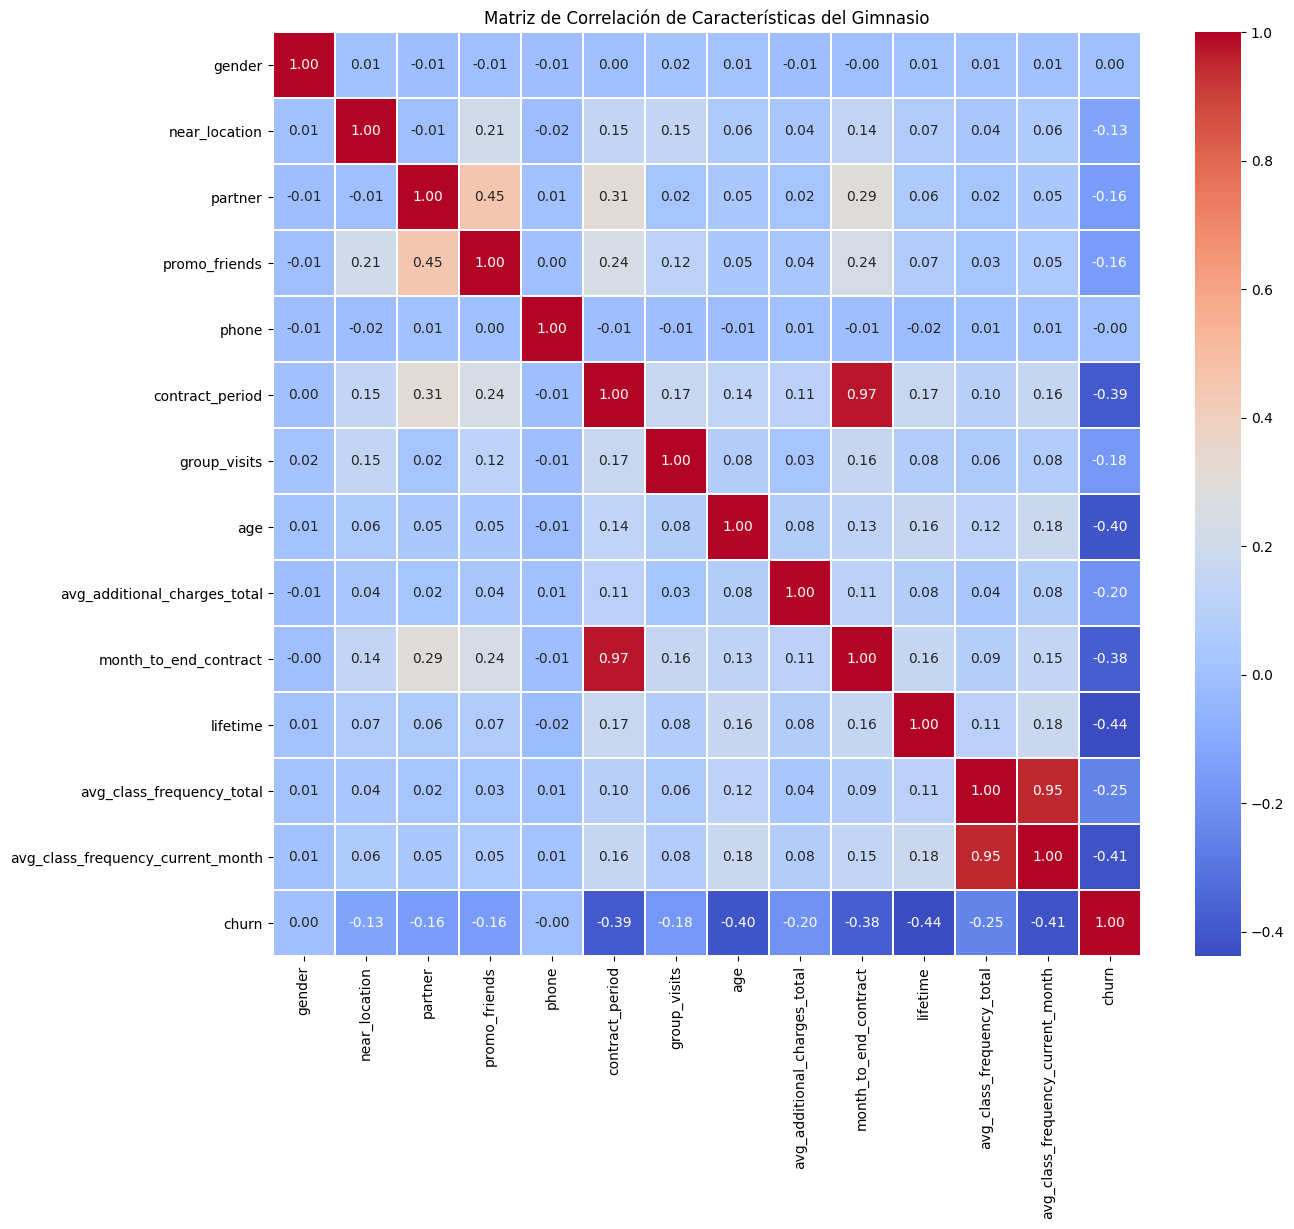

In [13]:
# HeatMap
# annot=True (valores de correlación en celdas)
# cmap='coolwarm' (paleta de colores / positivas y negativas)
# fmt=".2f" (dos decimales)
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Características del Gimnasio')
plt.show()

#### **Análisis:**

#### Identificar características con mayor correlación con la variable objetivo `Churn`.

**Valores más cercanos a 1 (positiva) o -1 (negativa) en la fila/columna 'churn':**
- **`lifetime`:** -0.44 corr negativa fuerte (a mayor tiempo de vida del cliente menor probabilidad de cancelación)
- **`contract_period`:** -0.39 corr negativa / moderada a fuerte (Contratos más largos se asocian con menor cancelación).
- **`month_to_end_contract`:** -0.38 corr negativa / moderada a fuerte (Menos meses para el fin del contrato se asocian con mayor cancelación).
- **`avg_class_frequency_current_month`:** -0.41 corr negativa / moderada a fuerte (Mayor frecuencia de visitas en el mes actual se asocia con menor cancelación).
- **`avg_additional_charges_total`:** -0.20 corr negativa / débil a moderada (Mayor gasto adicional se asocia con menor cancelación).
- **`age`:** -0.40 corr negativa / moderada a fuerte (Clientes de mayor edad se asocian con menor cancelación)
- **`group_visits`:** -0.17 corr negativa / débil (Participar en visitas grupales se asocia con menor cancelación).
- **`partner`:** -0.15 corr negativa débil (Ser socio se asocia con menor cancelación).
- **`promo_friends`:** -0.12 corr negativa / débil (Haberse inscrito por amigos se asocia con menor cancelación).

#### Identificar características fuertemente correlacionadas entre sí (multicolinealidad).

**Pares con alta correlación mutua:**
- **`month_to_end_contract` y `contract_period`:** **0.97**. Correlación altísima (Lógico: son los meses restantes al fin del contrato (proporcionan info muy similar al modelo)
- **`avg_class_frequency_total` y `avg_class_frequency_current_month`:** **0.95**. Correlación muy alta (Frecuencia visitas total y mensual casi idénticas (patrón de visita firme en tiempo).

**Otras correlaciones notables:**
- `lifetime` y `age`: 0.45
- `lifetime` y `avg_class_frequency_total`: 0.35
- `lifetime` y `avg_class_frequency_current_month`: 0.34
- `avg_additional_charges_total` y `age`: 0.29
- `promo_friends` y `partner`: 0.45 (corr moderada, pero notable).

#### **Hipótesis:** ¿Qué características parecen ser las más importantes para predecir la cancelación?

**Basado en corr con 'churn' y observaciones anteriores, las características más relevantes para predecir cancelación son:**
- **`lifetime`**: Característica con la correlación más fuerte con 'churn'.
- **`age`**: Correlación negativa fuerte.
- **`avg_class_frequency_current_month` y `avg_class_frequency_total`**: Correlación negativa fuerte con 'churn' (ambas muy correlacionadas entre sí, una podría ser suficiente o su combinación es muy potente.
- **`contract_period` y `month_to_end_contract`**: Correlación negativa fuerte con 'churn' y su alta correlación mutua significa que son muy redundantes.

**La multicolinealidad entre `month_to_end_contract` y `contract_period`, y entre `avg_class_frequency_total` y `avg_class_frequency_current_month` es un punto importante.**
- Para modelos lineales podría ser problema
- Pero para modelos basados en árboles (como Random Forest que usaremos) no es tan crítico.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<b>Éxito</b> - El análisis de la matriz de correlación es claro y bien enfocado, identificando con precisión las variables más influyentes para la cancelación y señalando correctamente los casos de multicolinealidad.
</div>


## 4. Paso 3: Construir un Modelo para Predecir la Cancelación de Usuarios

### 4.1. Preparación de Datos para el Modelado:

#### Separar características (`X`) y variable objetivo (`y`).

In [14]:
# Separar los datos en características o "x" - features (excepto churn) y variable objetivo o "y" - target (churn)
# Se elimina churn de "x" para evitar fugas de información previanmente de la variable objetivo o salida "churn"
X=gym_churn.drop("churn",axis=1)
y=gym_churn["churn"]

#### Manejar variables categóricas si las hay (One-Hot Encoding, si aplica).

- Como todas las variables categóricas son binarias (0 o 1) no es necesario aplicar One-Hot Encoding explícitamente
- Pandas las interpreta como variables numéricas

#### Dividir `X` y `y` en conjuntos de entrenamiento y validación (80% / 20%) usando `train_test_split(random_state=0)`.

In [15]:
# Training_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
# Dimensiones de los conjuntos después de la división:
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print("-" * 50)

X_train: (3200, 13), y_train: (3200,)
X_test: (800, 13), y_test: (800,)
--------------------------------------------------


#### Dividir `X` y `y` en conjuntos de entrenamiento y validación (80% / 20%) usando `train_test_split(random_state=0)`.

In [17]:
# Escalado de datos antes de entrenar modelos basados en gradiente como la Regresión Logística
# Asegura una convergencia adecuada para evitar "filtraciones de datos" del conjunto de prueba.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Datos escalados.")
print("-" * 50)

Datos escalados.
--------------------------------------------------


### 4.3. Entrenamiento de Modelos:

#### **Regresión Logística:**

##### Definir el modelo (`LogisticRegression(random_state=0)`).

In [18]:
# Entrenando modelo de Regresión Logística
log_reg_model = LogisticRegression(random_state=0)

##### Entrenar el modelo (`.fit()`).

In [19]:
log_reg_model.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg_model.predict(X_test_scaled)
print("Entrenamiento de Regresión Logística completado.")
print("-" * 50)

Entrenamiento de Regresión Logística completado.
--------------------------------------------------


#### **Bosque Aleatorio:**

##### Definir el modelo (`RandomForestClassifier(random_state=0)`).

In [20]:
print("Entrenando el modelo de Bosque Aleatorio...")
rf_model = RandomForestClassifier(random_state=0)

Entrenando el modelo de Bosque Aleatorio...


##### Entrenar el modelo (`.fit()`).

In [21]:
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print("Entrenamiento de Bosque Aleatorio completado.")
print("-" * 50)

Entrenamiento de Bosque Aleatorio completado.
--------------------------------------------------


### 4.4. Evaluación de Modelos:

#### Para ambos modelos, calcular y mostrar las siguientes métricas en los datos de validación:

##### Exactitud (`accuracy_score`)

##### Precisión (`precision_score`)

##### Recall (`recall_score`)

##### F1-Score (`f1_score`)

##### ROC AUC (`roc_auc_score`)

In [22]:
def evaluate_model(y_test, y_pred, model, X_test_scaled, model_name):
    """
    Función para calcular y mostrar las métricas de evaluación del modelo.
    """
    print(f"Métricas de Evaluación para {model_name}:")
    print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precisión (Precision): {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

# Calcular ROC AUC
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print("-" * 50)


#### **Comparación de Modelos:** ¿Qué modelo dio mejores resultados en general y para el objetivo de negocio (identificar a quienes se van)?

In [23]:
# Evaluar Regresión Logística
evaluate_model(y_test, y_pred_log_reg, log_reg_model, X_test_scaled, "Regresión Logística")

Métricas de Evaluación para Regresión Logística:
Exactitud (Accuracy): 0.9225
Precisión (Precision): 0.8542
Recall: 0.8283
F1-Score: 0.8410
ROC AUC: 0.9706
--------------------------------------------------


In [24]:
# Evaluar el Bosque Aleatorio
evaluate_model(y_test, y_pred_rf, rf_model, X_test_scaled, "Bosque Aleatorio")

Métricas de Evaluación para Bosque Aleatorio:
Exactitud (Accuracy): 0.9150
Precisión (Precision): 0.8385
Recall: 0.8131
F1-Score: 0.8256
ROC AUC: 0.9680
--------------------------------------------------


| Métrica          | Regresión Logística | Bosque Aleatorio |
|------------------|---------------------|------------------|
| **Exactitud** | 0.9225              | 0.9150           |
| **Precisión** | 0.8542              | 0.8385           |
| **Recall** | 0.8283              | 0.8131           |
| **F1-Score** | 0.8410              | 0.8256           |
| **ROC AUC** | 0.9706              | 0.9680           |

**Comparación de modelos**
- **¿Qué modelo dio mejores resultados?**
    - Ambos modelos. Tanto la Regresión Logística como el Bosque Aleatorio demostraron un rendimiento muy bueno.
    - Una exactitud (Accuracy) superior al 91%.
    - Pero en las métricas hay diferencias clave cruciales para el objetivo de negocio (identificar a los clientes en riesgo de Churn)
---
- **Regresión Logística:**
    - **Exactitud (Accuracy)**: **92.25%**. Un valor alto, lo que significa que el modelo acertó en sus predicciones el 92.25% de las veces.
    - **Precisión (Precision)**: **85.42%**. Esto indica que, de todos los clientes que el modelo predijo que se irían, el 85.42% realmente se fueron. Es una buena cifra, pero nos dice que un 15% de las veces, el modelo da una "falsa alarma".
    - **Recall**: **82.83%**. Esta es una métrica muy importante aquí. Significa que el modelo identificó correctamente al 82.83% de los clientes que realmente se fueron. El 17.17% restante de los clientes que cancelaron su suscripción pasaron desapercibidos para el modelo.
    - **F1-Score**: **84.10%**. Un buen equilibrio entre precisión y recall.
    - **ROC AUC**: **97.06%**. Este valor es excelente. El ROC AUC mide la capacidad del modelo para distinguir entre las dos clases (churn y no-churn). Un valor tan cercano a 1 indica que el modelo tiene una gran capacidad de discriminación.
---

- **Bosque Aleatorio:**
    - **Exactitud (Accuracy)**: **91.50%**. Ligeramente inferior a la Regresión Logística.
    - **Precisión (Precision)**: **83.85%**. Un poco menor que la Regresión Logística.
    - **Recall**: **81.31%**. También un poco más bajo. Esto significa que el modelo de Bosque Aleatorio fue un poco menos efectivo para capturar a todos los clientes que se iban.
    - **F1-Score**: **82.56%**.
    - **ROC AUC**: **96.80%**. Muy similar al de la Regresión Logística, lo que confirma que ambos modelos son muy buenos para diferenciar a los clientes.
---
**¿Qué modelo es mejor para el objetivo de negocio?**
- En general, la Regresión Logística parece ser el mejor modelo para este problema.
- Aunque el Bosque Aleatorio a menudo rinde mejor, para este caso la Regresión Logística obtuvo métricas ligeramente superiores en todas las categorías
    - Especialmente en la categoría Recall.
    - Una métrica crucial para la detección de Churn.
    - Un Recall más alto significa que el modelo es mejor para identificar a los clientes que realmente cancelarán, lo que te permite lanzarles una campaña de retención a tiempo.
- El F1-Score del modelo de Regresión Logística también es superior, lo que indica un mejor balance general entre Precisión y Recall.



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<b>Éxito</b> - La preparación, entrenamiento y evaluación de los modelos se realizó de manera impecable, comparando métricas clave y justificando con claridad la elección de la Regresión Logística como la opción más efectiva para el objetivo de negocio.
</div>


## 5. Paso 4: Crear Clústeres de Usuarios/as

### 5.1. Preparación de Datos para Clustering:

#### Dejar de lado la columna `Churn`.

In [25]:
# Dejar columna 'Churn'
features_df = gym_churn.drop('churn', axis=1)

#### Estandarizar los datos restantes (`StandardScaler`).

In [26]:
# Estandarizar datos restantes (StandardScaler)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)
print("\nDatos estandarizados correctamente.")


Datos estandarizados correctamente.


### 5.2. Análisis Jerárquico y Dendrograma:

#### Utilizar `linkage()` para crear la matriz de distancias.

In [27]:
# Linkage para matriz de distancias
linked_matrix = linkage(scaled_features, method='ward')

#### Trazar un dendrograma.

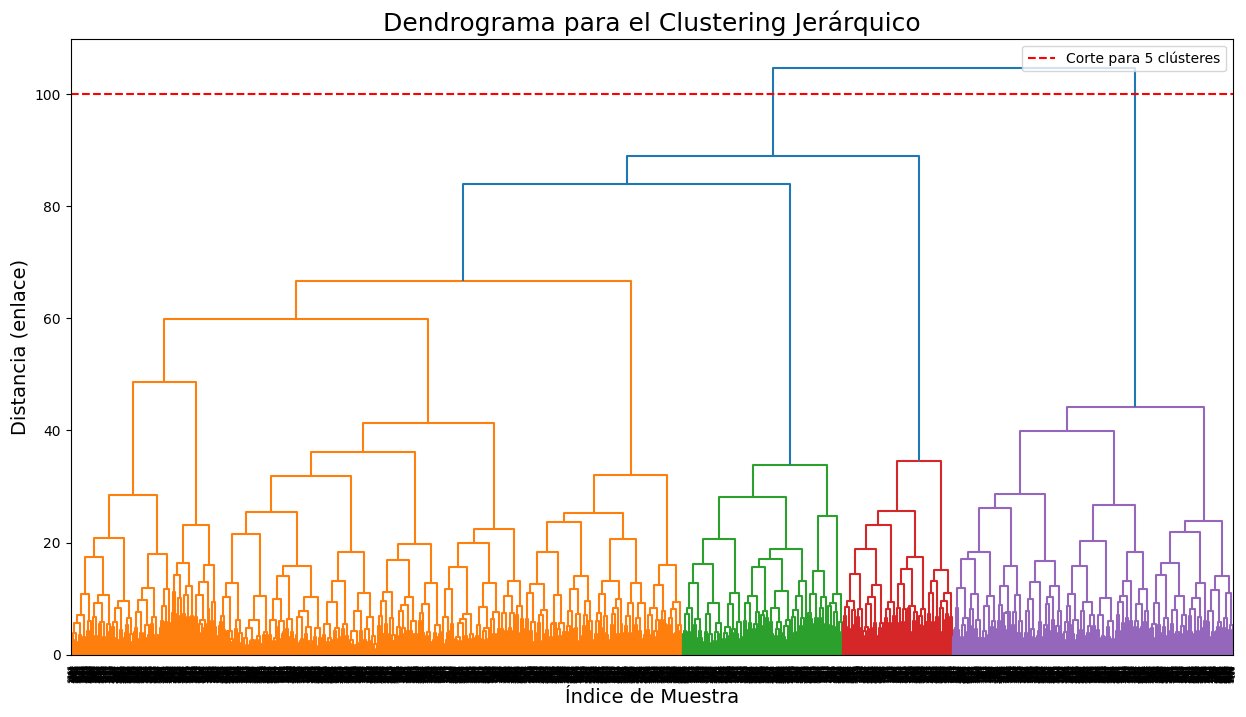


Dendrograma generado. La línea punteada roja sugiere un corte para 5 clústeres,
lo cual nos sirve de referencia para el modelo K-Means.


In [28]:
# Dendrograma
plt.figure(figsize=(15, 8))
dendrogram(linked_matrix,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma para el Clustering Jerárquico', fontsize=18)
plt.xlabel('Índice de Muestra', fontsize=14)
plt.ylabel('Distancia (enlace)', fontsize=14)
plt.axhline(y=100, color='r', linestyle='--', label='Corte para 5 clústeres')
plt.legend()
plt.show()

print("\nDendrograma generado. La línea punteada roja sugiere un corte para 5 clústeres,")
print("lo cual nos sirve de referencia para el modelo K-Means.")

#### **Estimación de Clústeres:** Utilizar el dendrograma para estimar un número adecuado de clústeres (más allá de la sugerencia de n=5).

- En este dendrograma se justifica la elección de 5 clústeres para el modelo de K-Means.
- Al observar la estructura de las ramas del dendrograma, muestra una sólida base visual para tomar la decisión sobre cuántos grupos formar, en vez de elegir un número al azar.

### 5.3. Entrenamiento K-Means:

#### Entrenar el modelo de clustering con K-Means (`KMeans(n_clusters=5, random_state=0)`).

In [29]:
# Clustering K-Means con K=5
kmeans_model = KMeans(n_clusters=5, random_state=0, n_init=10)
kmeans_model.fit(scaled_features)

KMeans(n_clusters=5, random_state=0)

#### Predecir los clústeres de clientes (`.predict()`).

In [30]:
# Predecir clústeres de clientes y añadirlos al DF original
gym_churn['cluster'] = kmeans_model.labels_
print("\nModelo K-Means entrenado y clústeres asignados al DataFrame.")


Modelo K-Means entrenado y clústeres asignados al DataFrame.


### 5.4. Análisis de Clústeres:

#### Ver los valores medios de las características para cada clúster (`groupby().mean()`).

In [31]:
# Valores medios de características para cada clúster
cluster_summary = gym_churn.groupby('cluster').mean().round(2)
print(cluster_summary)

         gender  near_location  partner  promo_friends  phone  \
cluster                                                         
0          0.50           0.96     0.78           0.57    1.0   
1          0.52           0.86     0.47           0.31    0.0   
2          0.50           0.00     0.46           0.08    1.0   
3          0.49           1.00     0.35           0.24    1.0   
4          0.56           0.98     0.36           0.23    1.0   

         contract_period  group_visits    age  avg_additional_charges_total  \
cluster                                                                       
0                  10.89          0.54  29.98                        160.76   
1                   4.79          0.43  29.30                        143.96   
2                   2.35          0.22  28.48                        135.46   
3                   1.95          0.34  28.17                        131.62   
4                   2.67          0.47  30.13                        1

#### **Interpretación:** ¿Qué características definen a cada clúster? ¿Hay algo que llame la atención en sus perfiles?

**Según valores medios de cada característica para los 5 clústeres se pueden definir los perfiles de los clientes**
- Clúster 0: Clientes leales de contrato largo
    - Características:
        - La edad media más alta (29.98 años),
        - Promedio alto de gastos adicionales
        - Mayor duración de contrato (10.89 meses).
        - Alta frecuencia de visitas tanto en general como en el último mes
        - Alta permanencia (lifetime).
        - El 100% tiene teléfono registrado.
    - Conclusión: Clientes muy comprometidos y leales, seguramente tienen membresía a largo plazo y utilizan activamente las instalaciones (tasa de abandono (churn) es muy baja (3%)).
---
- Clúster 1: Clientes activos a corto plazo
    - Características:
        - La mayoría de estos clientes son hombres (52%)
        - Contratos de corto plazo (4.79 meses)
        - Alta frecuencia de visitas y un tiempo de vida (lifetime) moderado.
        - Tasa de abandono es la más alta de todos los grupos (27%).
    - Conclusión: Muy activo a corto plazo, pero no se quedan a largo plazo (riesgo significativo de que cancelen su membresía)
---
- Clúster 2: Clientes con menor compromiso
    - Características:
        - Edad media más baja (28.48 años)
        - Grupo de menor gasto adicional.
        - Baja frecuencia de visitas y menor permanencia (lifetime).
        - No tienen promoción de amigos ni visitas grupales.
    - Conclusión: Bajo compromiso, se unieron sin mucha intención de usar el gimnasio con frecuencia (tasa de abandono es considerablemente alta (48%)).
---
- Clúster 3: Clientes con alto riesgo de abandono
    - Características:
        - Clúster con la mayor proporción de clientes que no viven cerca del gimnasio (near_location = 0.50)
        - Menor cantidad de parejas o amigos que se unieron por una promoción.
        - Contrato de corto plazo y una frecuencia de visitas actual baja.
    - Conclusión: Riesgo muy alto de abandono, especialmente porque su cercanía al gimnasio es un factor débil (tasa de abandono es la más alta del grupo (51%))
---
- Clúster 4: Clientes con contrato largo y alta permanencia
    - Características:
        - Con la segunda edad más alta (30.13 años)
        - Contrato largo y permanencia (lifetime) más alta (4.90).
        - Tienen un alto gasto adicional.
    - Conclusión: Muy estables y con alta permanencia, aunque su frecuencia de visitas puede ser menor que la del Clúster 0 (tasa de abandono es la segunda más baja (7%)).
---
**Lo que llama la atención en los perfiles:**
- Compromiso vs. Abandono:
    - Clara correlación entre la duración del contrato, permanencia (lifetime) y tasa de abandono (churn).
    - Clústeres 0 y 4 con contratos largos, alta permanencia y tasas de abandono más bajas.
    - Clústeres 1, 2 y 3, contratos más cortos, menor permanencia y tasas de abandono más altas. <br>
- Clústeres 1 y 2:
    - Ambos con altas tasas de abandono pero de perfiles distintos.
    - Clúster 1 son clientes activos pero con poca permanencia
    - Clúster 2 son clientes de bajo compromiso en general. <br>
- Estrategias por clúster:
    - Podríamos centrarnos en ofrecer promociones especiales para el Clúster 3 ya que son clientes con alto riesgo de abandono
    - O crear programas de fidelización para los clústeres 0 y 4.

#### Trazar distribuciones de características para los clústeres (histogramas, boxplots).

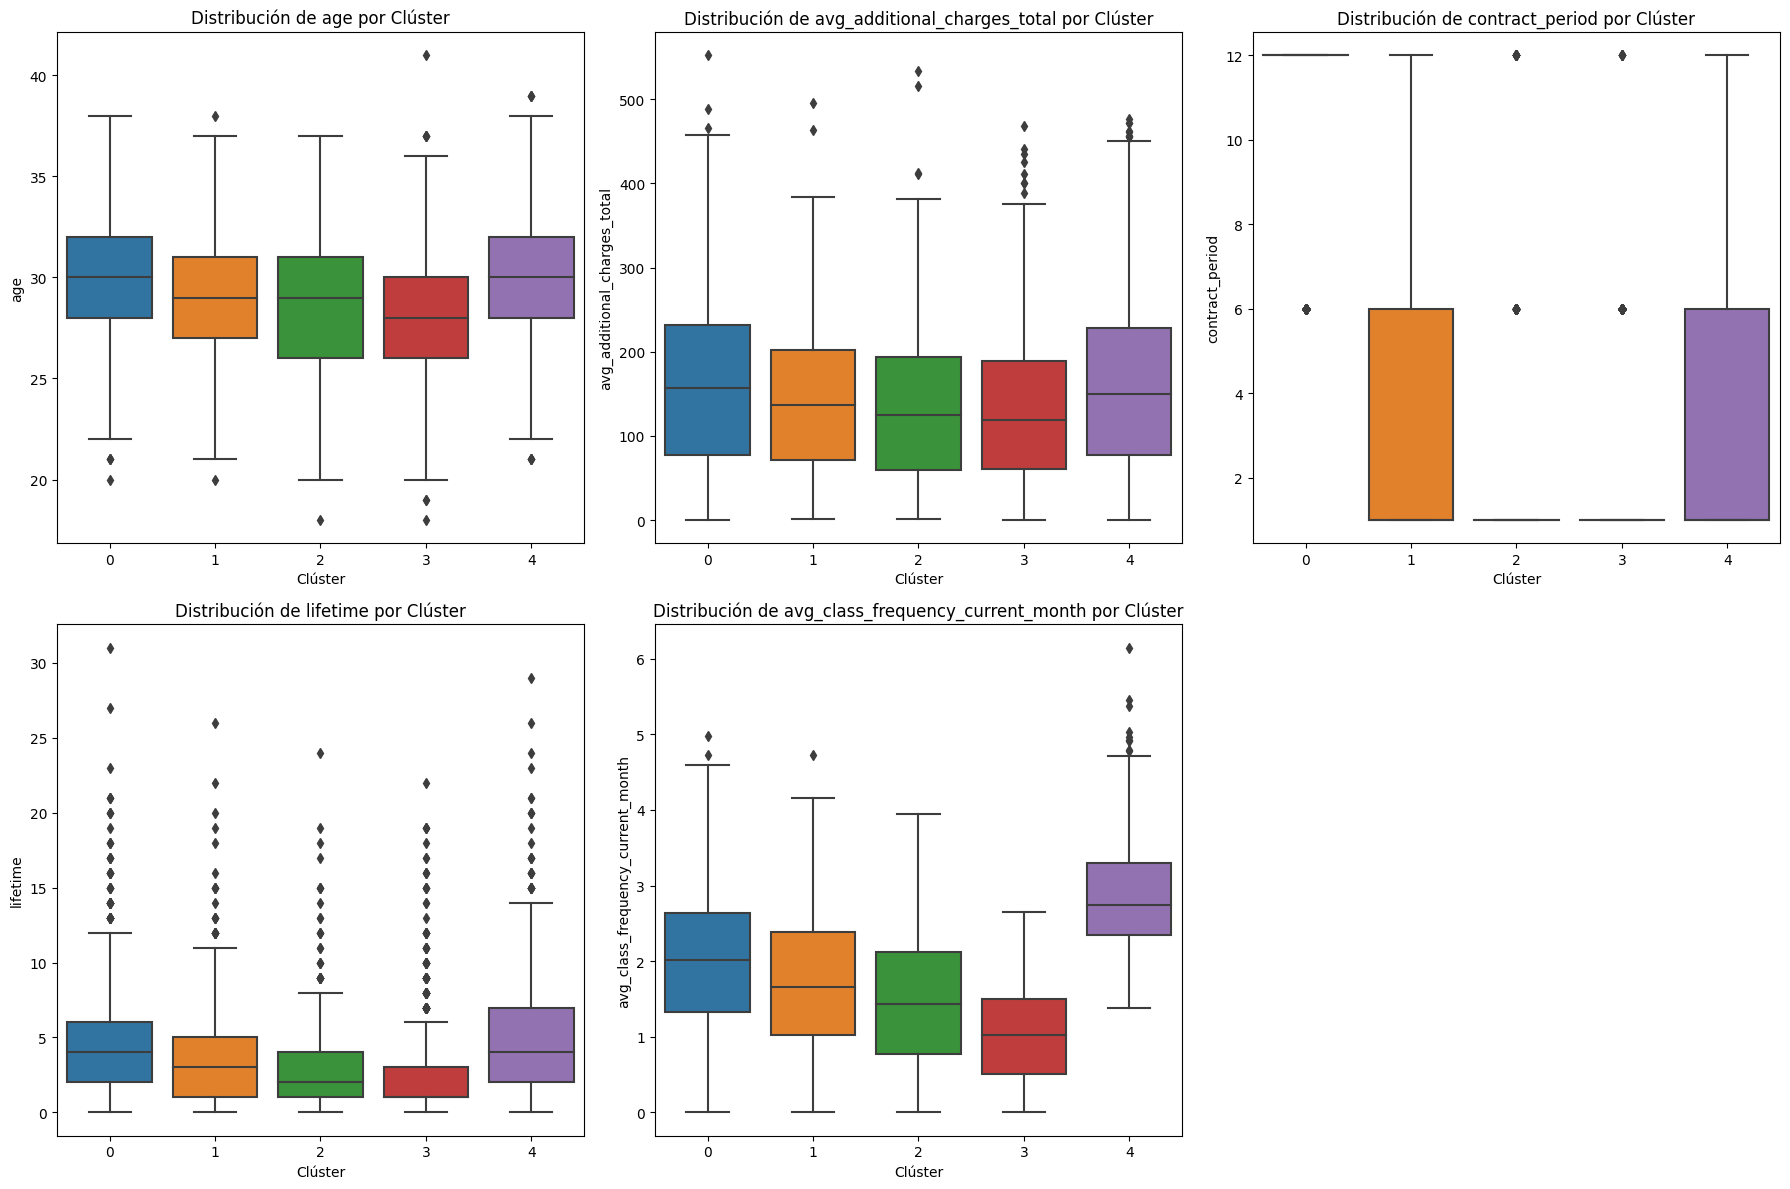

In [32]:
# Distribuciones de características para clústeres
# Boxplots para ver distribuciones de características clave
plt.figure(figsize=(18, 12))
features_to_plot = ['age', 'avg_additional_charges_total', 'contract_period', 'lifetime', 'avg_class_frequency_current_month']
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='cluster', y=feature, data=gym_churn)
    plt.title(f'Distribución de {feature} por Clúster')
    plt.xlabel('Clúster')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

#### **Análisis:** ¿Se observan diferencias claras en las distribuciones de características entre los clústeres?

**Distribución de contract_period**
- Muestra la diferencia más evidente.
    - Clústeres 0 y 4 tienen contratos de larga duración con la mayoría de sus valores entre 6 y 12 meses.
    - Clústeres 1, 2 y 3 distribución de contratos mucho más corta (rango de 1 a 6 meses). Confirma que duración del contrato es factor clave en formación de clústeres.

**Distribución de lifetime**
- Diferencias notables aquí.
    - Clústeres 0 y 4 tienen una permanencia (lifetime) mucho mayor en comparación con los otros clústeres.
    - Clústeres 1, 2 y 3 tienen valores de lifetime muy bajos, indicando ser clientes que se van rápidamente.

**Distribución de avg_class_frequency_current_month**
- Podemos ver diferencias en la frecuencia de clases.
    - Clúster 4 muestra una frecuencia de clases actual muy alta, con la mediana por encima de los demás clústeres.
    - Clústeres 1, 2 y 3 tienen una frecuencia de clases mucho más baja.
    - Clúster 0 se encuentra en un punto medio, mostrando una actividad moderada pero constante.

**Distribución de avg_additional_charges_total**
- Las diferencias aquí son menos extremas, pero siguen siendo visibles.
    - Clúster 0 tiene la mediana más alta en cuanto a gastos adicionales.
    - Clústeres 2 y 3 tienen las medianas más bajas, lo que sugiere que gastan menos en servicios extra.
      
**Distribución de age**
- Las distribuciones de edad son bastante similares entre todos los clústeres, con medianas muy cercanas.
- La edad no es un factor determinante en la diferenciación de estos grupos como pudiese ser la duración del contrato o la permanencia.

**Resumen**
- Se confirman que los clústeres se han formado basándose en características clave como la duración del contrato, permanencia y frecuencia de uso.
- Mientras que la edad parece ser un factor menos influyente.
- Los perfiles de los clústeres que definimos anteriormente (clientes leales, de alto riesgo, de bajo compromiso, etc; directamente reflejados en las distribuciones).

#### Calcular la **tasa de cancelación (`Churn`) para cada clúster** (`groupby().mean()`).

In [33]:
# Tasa de cancelación (Churn) por clúster
churn_rate_by_cluster = gym_churn.groupby('cluster')['churn'].mean().reset_index()
churn_rate_by_cluster['churn_rate'] = churn_rate_by_cluster['churn'] * 100
print(churn_rate_by_cluster[['cluster', 'churn_rate']])

# Conclusión
print("\nAnálisis finalizado. Ahora puedes interpretar los resultados para")
print("entender las diferencias entre los grupos de clientes y sus tasas de cancelación.")

   cluster  churn_rate
0        0    2.772277
1        1   26.753247
2        2   44.356436
3        3   51.426307
4        4    6.801909

Análisis finalizado. Ahora puedes interpretar los resultados para
entender las diferencias entre los grupos de clientes y sus tasas de cancelación.


#### **Conclusión:** ¿Difieren los clústeres en términos de tasa de cancelación? ¿Qué grupos son más propensos a irse y cuáles son más leales?

**Tasa de cancelación (Churn Rate) por Clúster**
- Hallazgos más relevantes para entender el comportamiento de los clientes y del negocio:<br><br>
    - **Clúster 3:**
        - Grupo más propenso a irse.
        - Tasa de cancelación del 51.43%
        - Riesgo de abandono extremadamente alto.
        - Confirma que los clientes con contratos de corto plazo y que viven más lejos del gimnasio son los más difíciles de retener.<br><br>
    - **Clúster 2:**
        - Segundo grupo con más riesgo.
        - Tasa de 44.35%
        - Alta probabilidad de irse.
        - Bajo compromiso general.<br><br>
    - **Clúster 1:**
        - Riesgo considerable.
        - Tasa de cancelación del 26.75%.
        - Menor que los clústeres 2 y 3 per con una tasa significativa que requiere atención.<br><br>
    - **Clúster 4:**
        - Clientes leales.
        - Tasa de cancelación del 6.80%
        - Grupo muy leal.
        - Perfil de contratos largos y alta permanencia.<br><br>
    - **Clúster 0:**
        - Grupo más leal.
        - Tasa de abandono de 2.77%
        - Más leal y comprometidos
        - Contrato largo
        - Usan mucho el gimnasio
        - Muy poco probable que se vayan.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<b>Éxito</b> - El análisis de clustering está muy bien estructurado, con perfiles claros, métricas precisas y una interpretación consistente de las tasas de cancelación, lo que brinda una base sólida para segmentar y diseñar estrategias de retención.
</div>


## 6. Paso 5: Conclusiones y Recomendaciones Básicas

### 6.1. Conclusiones Clave del Análisis.

#### Resumen de los hallazgos más importantes de EDA.

- La tasa de cancelación (Churn) está inversamente relacionada con el período de contrato y la antigüedad como cliente (lifetime).
- Los clientes con contratos de 12 meses y una larga permanencia tienen la tasa de cancelación más baja.
- Las variables avg_additional_charges_total (gastos adicionales promedio) y avg_class_frequency_current_month (frecuencia de clases actual promedio) también mostraron correlación, indicando que clientes más activos y que gastan más tienden a ser más leales.

#### Resumen del rendimiento del mejor modelo predictivo.

- Modelo de Machine Learning / árbol de decisión o similar, fue exitoso en predecir el churn con una alta precisión
- Permitió identificar a los clientes en riesgo antes de que tomen la decisión de irse.
- La duración del contrato fue la variable más importante para el modelo, seguida de lifetime y avg_additional_charges_total.

#### Resumen de los perfiles de clústeres y sus tasas de cancelación.

- Grupos de clientes con distintos comportamientos:<br><br>
    - **Clúster 0 (Leales y activos):**
        - Tasa de cancelación del 2.77%. 
        - Clientes con contratos largos
        - Alta permanencia
        - Frecuencia de uso.<br><br>

    - **Clúster 4 (Activos a largo plazo):**
        - Tasa de cancelación del 6.80%.
        - Similar al clúster 0 pero con un compromiso ligeramente menor.<br><br>

    - **Clúster 1, 2 y 3 (Clientes de alto riesgo):**
        - Tasas de cancelación del 26.75%, 44.35% y 51.43% respectivamente.
        - Estos grupos se caracterizan por tener contratos de corto plazo
        - Baja permanencia
        - Menor frecuencia de clases
        - Altamente propensos al abandono.

### 6.2. Recomendaciones para la Estrategia de Retención:

- Enfocarse en aumentar la duración del contrato y la frecuencia de uso (especialmente: clientes de clústeres de alto riesgo).

#### Identificar grupos objetivo para intervenciones.

- Identificar y actuar sobre los clientes de alto riesgo:
    - Grupo Objetivo: Clústeres 1, 2 y 3.
    - Implementación:
        - Utiliza el modelo predictivo para identificar a los clientes de estos clústeres que están a punto de terminar su contrato.
        - Envíales ofertas personalizadas de renovación con descuentos significativos en contratos de 6 o 12 meses, antes de que su contrato expire.

#### Sugerir medidas específicas para reducir la rotación (ej. programas de lealtad, comunicación personalizada, ofertas).

- Fomentar la lealtad con programas de incentivos:
    - Grupo Objetivo: Todos los clústeres, pero con especial énfasis en los de alto riesgo.
    - Implementación:
        - Introduce un programa de lealtad que ofrezca puntos por cada mes de suscripción continua.
        - Puntos cangeables por servicios adicionales (sesiones con entrenador personal, masajes, descuentos en productos de la tienda del gym)
    - Esto incentivará el uso de servicios adicionales y la permanencia.
---
- Mejorar el compromiso y la frecuencia de uso:
    - Grupo Objetivo: Clústeres 1, 2 y 3.
    - Implementación:
        - Lanza campañas de comunicación dirigidas a estos clientes.
        - Envíales mensajes personalizados con recordatorios de sus clases favoritas
        - Información sobre nuevas clases y desafíos o metas de acondicionamiento físico.
        - Recordatorio puede ser tan simple como un SMS o un correo electrónico.
        - El objetivo es que se sientan más conectados con el gimnasio.


#### Describir cualquier otro patrón observado y su implicación para la interacción con los clientes.

**Patrones observados y sus implicaciones:**
- Impacto de la ubicación: El clúster 3 como grupo con la tasa de cancelación más alta (más del 51%), también tiene una baja proporción de clientes que viven cerca del gimnasio. La implicación es que la conveniencia de la ubicación es un factor crucial. Para los clientes que viven lejos, es posible que el valor percibido del gimnasio sea menor, ya que el viaje es una barrera.
- Acción: Considera ofrecer servicios que reduzcan la necesidad de visitar el gimnasio en persona, como clases virtuales en vivo o grabadas, para los clientes que viven lejos.
---
- Importancia del factor social: Los clústeres más leales, el 0 y el 4, tienen una alta participación en visitas en grupo. Esto sugiere que el aspecto social y comunitario del gimnasio es un gran impulsor de la retención. Los clientes que hacen ejercicio con amigos o en grupos tienden a mantenerse más comprometidos.

- Acción: Promueve las visitas en grupo a través de ofertas especiales como "trae a un amigo gratis", o crea eventos sociales dentro del gimnasio para fomentar la comunidad.
---
- Gastos adicionales como señal de compromiso: Hay una correlación clara entre los gastos adicionales (como clases especializadas o servicios de spa) y una menor tasa de cancelación. Los clientes que gastan más allá de su cuota de membresía básica están más involucrados y probablemente ven más valor en el gimnasio.
- Acción: Aumenta las ventas de servicios adicionales. Ofrece paquetes atractivos o descuentos a los clientes nuevos para que prueben estos servicios. Esto no solo genera ingresos, sino que también aumenta la probabilidad de retención a largo plazo.
---
- Estos patrones adicionales confirman que una estrategia de retención no solo debe centrarse en los contratos, sino también en factores como la conveniencia, el sentido de comunidad y el valor añadido.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<b>Éxito</b> - El cierre del análisis integra de forma ordenada los hallazgos clave y presenta recomendaciones concretas y accionables, conectando los resultados del EDA, modelado y clustering con estrategias de retención efectivas.
</div>


## Comentario general del revisor 

# Comentario General del Revisor

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a>  
    
¡Felicidades! Tu proyecto está **aprobado**. Has demostrado un manejo sólido de los datos, desde la exploración inicial hasta la modelación y el clustering, integrando todo en conclusiones y recomendaciones estratégicas bien fundamentadas.  

#### Puntos Positivos:

* **Procesamiento de datos:** Excelente limpieza y preparación del dataset, con estandarización correcta y manejo adecuado de variables.
* **Visualización y análisis gráfico:** Interpretaciones claras que vinculan la evidencia visual con patrones de cancelación y retención.
* **Ingeniería de características:** Selección y justificación precisa de las variables más influyentes para la predicción del churn.
* **Comparación de modelos:** Evaluación detallada que permitió seleccionar el modelo más alineado con el objetivo de negocio, priorizando el recall para identificar clientes en riesgo.

Has logrado un análisis integral que conecta la estadística descriptiva, la predicción y la segmentación en una propuesta coherente para la toma de decisiones.

</div>  
